## 线性回归、线性分类、逻辑回归、逻辑分类的区别 ##

**线性回归：**

线性回归就是计算回归系数，通过回归系数线性组合属性预测数值结果。

线性回归以误差平方和最小为目的，其实是在假定**误差**服从高斯分布

> $f(x)=xw+b$

**二分类的线性分类：**

在线性回归的基础上添加了大于和小于0的判断。当值大于0属于一种分类，当值小于0等于另一种分类。

$$ f(n)= \begin{cases} 1, & \text {f(x) $\geq$ 0} \\ -1, & \text{f(x)<0} \end{cases} $$

**逻辑回归：**

逻辑回归是逻辑分类的一种。

逻辑分类为

> $y =f(x*w+b)$

当f函数为sigmoid函数时，就是逻辑回归。即

> $y =sigmoid(x*w+b)$

逻辑回归就是在线性回归的基础上，再经过sigmoid这个非线性函数，将值转化为分类的概率。 逻辑回归实际上是采用的是 伯努利分布来分析**误差**。

**sigmoid函数：**

> $sigmoid(x)=\frac{1}{1+e^{-x}} $

这个激活函数，一个输入值产生一个输出值，当输入为向量，就会每个分量计算一个输出值，再将所有的输出值组合成输出向量。

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/c54510a503a382486e2470046fd1726a.gif)

**逻辑分类：**

逻辑分类属于线性模型。

逻辑分类包含逻辑回归、一般线性回归。

逻辑回归为二分类问题，一般线性回归为多分类问题。

二分类：在逻辑回归的基础上，判断分类概率是否大于0.5，大于则属于这个分类。

$$ y= \begin{cases} 1, & \text {f(xw+b) $\geq$ 0.5} \\ -1, & \text{f(xw+b)<0.5} \end{cases} $$

而由于sigmoid函数是单调的，当sigmoid的输入为0时，输出为0.5，所以等价于逻辑回归二分类的判别为以下公式，这与线性分类的公式相同。

> $xw+b=0$

多分类：一般线性回归：

高斯分布、伯努利分布、贝塔分布、迪特里特分布，都属于指数分布。

所以一般线性回归就是用指数分布来处理噪声模型的方法。

一般使用softmax函数来处理多分类问题。softmax回归是一般线性回归的一个例子。

**$f(xw+b)=softmax(xw+b)$**

**softmax函数**

softmax函数其实就是一个归一化的指数函数

**$ softmax(x) = \frac{e^{x_i}}{\sum_i e^{x_i}}$**

这个激活函数，输入必须为一组向量，每个分量计算出一个比例值作为输出向量的分量。

在使用一般线性回归进行分类中，计算哪个分类的概率大就属于哪个分类。



> 注意：二分类逻辑回归的输出类别必须是0或1，建立模型时不需要对类标签进行one-hot编码，代表的结果为正样本的概率。

>多分类一般线性回归，必须将类标签进行one-hot编码。逻辑回归和一般线性回归只能分类线性模型。

>逻辑回归的每个样本的输出值为单个数值，表示正样本出现的概率，也就是类标号1出现的概率。一般逻辑回归的输出值为向量，表示每种类别出现的概率。


# 逻辑回归的损失函数

我们知道在线性回归中使用误差平方和作为损失函数，求解使损失函数最小的w是线性回归的目的。

在统计学上，衡量两个概率的分布向量的差异程度，叫做交叉熵（Cross Entropy）。

最大似然估计，是模型w必须让已出现样本出现的概率最大化。而已出现样本出现的概率为连乘积的形式，所以先要取log形式，转化为加法形式的对数似然函数。对数似然函数前面加一个负数系数，则最大化对数自然函数，等价于最小化损失函数。


交叉熵函数如下：

$D(y,p)=y log(p)+(1-y)log(1-p)$  其中$p=sigmoid(xw+b)$

逻辑分类中的损失函数为

$ loss(w,b)=-\frac{1}{m} \sum_{i=1}^m D(y_i,p_i)$

# 逻辑回归损失函数的来源

注意：**在二分类器中，取值结果类标号0、1，认为是正样本的输出概率，二分类中不需要进行one-hot编码，所以每个样本计算的值为一个数值。**

在多分类器中，要进行one-hot编码才能进行推导，每个样本计算的值为一个向量。

对于二分类，类标号为0-1，可以理解为正样本的输出概率。而由于类标号只能取0、1，取值结果是一个二项分布，概率函数服从伯努利分布。

sigmoid函数的输出值，表示样本为正样本的概率值。那么对于分类1和0的概率分别为：

$$P(y=1|x;\theta )=h_{\theta }(x)\\P(y=0|x;\theta )=1-h_{\theta }(x)$$

将上面两个公式写成一个公式为： 

$$P(y|x;\theta )=(h_{\theta }(x))^{y}((1-h_{\theta }(x)))^{1-y}$$


预测样本x的结果为真实结果y的概率为上面的公式。那么预测一批样本，预测结果全部都和真实结果一样的概率为下面的公式。

这也是最大似然的思想，逻辑回归似然函数： 

$$L(\theta )=\prod_{i=1}^{m}P(y_{i}|x_{i};\theta )=\prod_{i=1}^{m}(h_{\theta }(x_{i}))^{y_{i}}((1-h_{\theta }(x_{i})))^{1-y_{i}}$$

其中m表示样本数量。关于为什么最大似然函数就要取乘积，可以这样理解。

最大似然就是让已经发生的事情（也就是样本）在你的模型中出现的概率尽可能大。

也就是如果有一个和已知结果的样本特征一样的待测对象，那个你的预测结果也要和样本的真实结果尽可能一样。

而每个样本可以理解为一个独立的事件。所有事件发生的概率尽可能大，就可以用联合概率表示所有样本都发生的概率。

联合概率使用乘积的形式表示。这也就有了上述乘积的形式。

取对数： 

$$l(\theta )=logL(\theta )=\sum_{i=1}^{m}(y_{i}logh_{\theta }(x_{i})+(1-y_{i})log(1-h_{\theta }(x_{i})))$$

# 逻辑分类器的构成


> 在学习逻辑分类之前再强调一遍，**必须先将分类进行one-hot编码作为输出结果，后面的学习才能理解。**

> 也就是说如果有3种分类，后面的教程每个样本对象的输出结果都是3维的，而不再是线性回归教程中的一维数据结果。

线性回归为估值预测而生，逻辑分类为分类预测而生。

下面为线性回归和逻辑分类的模型示例。

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/7a59591072068091f88b1f2e8e2f8622.png)


逻辑分类是一个包含线性和非线性部分用来进行分类的分类器。我们以n分类为例进行分析。

假设已经知道回归系数矩阵w和偏量b，逻辑分类包含下面的3个步骤。

**1、计算线性函数的输出值**

根据输入对象x和已知的回归系数矩阵w，以及偏量b，计算输入经过线性函数后的输出值，即$h=wx+b$。输出值h也是n维的。每一维可以近似认为是待测对象偏向于每种分类的成分。

**2、将线性函数的输出结果转化为分类概率**

得到了线性函数的输出结果，还需要将每一个维度转化为对象属于每个分类的概率。使得每个概率在0-1之间。这是一步非线性操作，所以这一步不再属于线性回归的范围。

将输出结果转化为概率的函数我们称为阶跃函数，也叫做激活函数。

一般在神经网络中用的最多的是sigmoid和tanh，当然也有用relu的。这是针对“是”和“否”的分类，但当进行多分类时，就要用到softmax 。

如果使用sigmoid函数进行二分类，sigmoid函数的功能在于：

> $sigmoid(x)=\frac{1}{1+e^{-x}} $

1、将线性函数的输出向量作为输入的“分数”，将“分数”映射在（0,1）之间。

2、以“对数”的方式完成到（0,1）的映射，凸显大的分数的作用，使其输出的概率更高，抑制小分数的输出概率。


如果使用softmax函数进行多分类，softmax函数的功能在于：

**$ softmax(x) = \frac{e^{x_i}}{\sum_i e^{x_i}}$**

1、将线性函数的输出向量作为输入的“分数”，将“分数”映射在（0,1）之间，并且所有分数的和为1。

2、以“对数”的方式完成到（0,1）的映射，凸显其中最大的分数的作用，并抑制远低于最大分数的其他数值。

我们使用代码来看看softmax的效果。

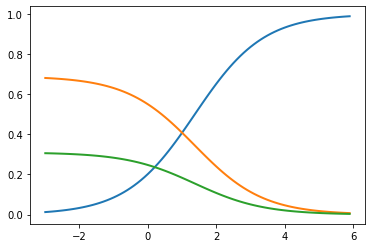

[0.65900114 0.24243297 0.09856589]
[1.00000000e+00 3.72007598e-44 3.04823495e-83]
[0.33656104 0.33321221 0.33022675]


In [3]:
# softmax函数
def softmax(s):
    return np.exp(s) / np.sum(np.exp(s), axis=0)


if __name__ == '__main__':
    # 查看softmax效果
    import numpy as np;
    import matplotlib.pyplot as plt;
    x = np.arange(-3.0, 6.0, 0.1)  # 等差数列
    scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])  # vstack将三个矩阵按列堆叠在一起。ones_like全1矩阵。模拟三种线性函数的输出向量作为softmax的输入
    plt.plot(x, softmax(scores).T, linewidth=2)  # 计算三种softmax函数的输出结果，绘制查看图形，了解softmax的特性:凸显其中最大的分数,抑制远低于最大分数的其他数值
    plt.show()

    # 分数扩大、缩小100倍
    scores = np.array([2.0, 1.0, 0.1])
    print(softmax(scores))
    print(softmax(scores * 100))
    print(softmax(scores / 100))

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/4971af6b641a38d5f271293cfedd55a5.png)

输出：
```
[ 0.65900114  0.24243297  0.09856589]
[  1.00000000e+00   3.72007598e-44   3.04823495e-83]
[ 0.33656104  0.33321221  0.33022675]
```

根据输出结果我们可以看出，当softmax的输入值被放大100倍时，数值之间的差距被拉大。

softmax对这种差距敏感，差距越大，分类器越‘自信’，差距越小，分类器越‘犹豫’。

**3、将分类概率转化为类别**

这一步就比较简单了，当属于某分类的概率最大时，就可以判定为数据该分类。

> 那如何求解正确的回归系数w和偏量b呢，因为只有有了正确的w和b，才能带入逻辑分类公式进行分类判别。

(后面的教程就省略b偏量，因为b偏量可以认为是样本一个值为1 的属性对应的权重)

# 求解回归系数

在逻辑分类器的结构中，我们知道逻辑分类包含了线性函数和激活函数两个过程。

线性函数$g$部分我们表示为：

$g(X)=XW$

逻辑回归的激活函数$f$部分我们表示为：

$f(Z)=sigmoid(Z)$
sigmoid函数的导数为$f'(Z)=f(Z)(1-f(Z))$

softmax回归的激活函数$f$部分表示为：

$f(Z)=softmax(Z)$

当然我们也可以直接将输入x表示为最终的输出结果

$Y=h(X)=f(Z)=f(g(X))=f(XW)$


----------


在线性回归中，我们学习了线性回归的梯度下降法和随机梯度下降法，在逻辑回归、甚至以后的神经网络、全连接神经网络、卷积神经网络、循环神经网络都是使用梯度下降法（随机梯度下降法）来进行后向传播算法实现回归系数w或网络层系数w的迭代收敛计算。

梯度下降法的步骤（线性回归、逻辑回归、所有的神经网络都是相同的步骤）：

1、写出损失函数。

2、损失函数对自变量w求导，得到w的梯度。

3、根据梯度，更新w权重。